In [1]:
#ANTES DE NADA DESTACAR QUE ESTE DOCUMENTO ES UN PEQUEÑO FRAGMENTO DEL TRABAJO FIN DE GRADO REALIZADO 
#POR GABRIEL VACARO GOYTIA E IGNACIO WARLETA MURCIA, HA SIDO ELEGIDO EN ESTE CASO PARA CORROBORAR QUE TANTO EL SVP
# COMO EL CVP (aqui se le llama NVP nearest vector problem, será una errata a corregir) SON INTRATABLES COMPUTACIONALMENTE.

In [1]:
#MODULOS A IMPORTAR
import numpy as np
import lattpy as lp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
import time  # Importar time para medir el tiempo


In [2]:
#FUNCIONES UTILIZADAS

def crear_atomos(latt, num_atoms, dimensiones=7):
    """
    Crea átomos en la red con posiciones aleatorias y únicas.
    
    Parámetros:
    latt: objeto de la red donde se agregarán los átomos.
    num_atoms: número de átomos a crear.
    dimensiones: número de dimensiones del espacio (por defecto 7).

    Retorna:
    None
    """
    # Crear un conjunto para asegurarnos de que las posiciones sean únicas
    posiciones_generadas = set()

    while len(posiciones_generadas) < num_atoms:
        # Generar coordenadas aleatorias en [0, 1] para todas las dimensiones
        coords = tuple(np.random.rand(dimensiones))  # np.random.rand genera valores en [0, 1)
        posiciones_generadas.add(coords)  # Añadir a un conjunto asegura unicidad

    # Agregar átomos únicos a la red
    for i, coords in enumerate(posiciones_generadas):
        nombre = f"Atom_{i + 1}"  # Nombra los átomos de forma automática
        latt.add_atom(list(coords), nombre)

# Función para generar los puntos del retículo
def generar_puntos_reticulo(base, limite):
    """
    Genera todos los puntos del retículo dados los vectores base y un límite de los enteros.

    base: matriz de base (n x n) que genera el retículo.
    limite: rango de los valores enteros para las combinaciones.

    Retorna un arreglo con todos los puntos del retículo.
    """
    # Generamos todas las combinaciones posibles de los enteros para k1, k2, ..., kn
    posibles_k = list(product(range(-limite, limite + 1), repeat=base.shape[0]))

    # Generamos los puntos del retículo como combinaciones lineales de los vectores base
    puntos_reticulo = []
    for k in posibles_k:
        punto = sum(k[i] * base[i] for i in range(len(k)))
        puntos_reticulo.append(punto)
    
    return np.array(puntos_reticulo)



#Funcion para calcular el vector mas cercano dado un punto
def nearestVector(base, limite, puntos_reticulo, target_point):
    """
    Encuentra el vector más cercano desde un punto objetivo (target_point) a todos los puntos del retículo.
    
    base: matriz de base del retículo.
    limite: rango de los índices.
    puntos_reticulo: arreglo con los puntos del retículo generados.
    target_point: punto objetivo desde el cual buscar el vector más cercano.
    
    Retorna el vector más cercano y su norma.
    """
    
    # Inicializar variables para almacenar el mejor vector y su norma más baja
    mejor_vector = None
    menor_norma = float('inf')

    # Iterar sobre todos los puntos del retículo
    for punto in puntos_reticulo:
        if not np.array_equal(punto, target_point):  # Evitar el propio punto objetivo
            vector = punto - target_point  # Vector entre el punto objetivo y el punto del retículo
            norma = np.linalg.norm(vector)  # Calcular la norma del vector

            # Si encontramos un vector con norma menor, lo actualizamos
            if norma < menor_norma:
                mejor_vector = vector
                menor_norma = norma
    
    return mejor_vector, menor_norma


# Función para calcular el vector más corto entre todos los puntos del retículo
def shortestVector(base, limite, puntos_reticulo):
    """
    Encuentra el vector más corto entre todos los puntos del retículo generado por los vectores base,
    excluyendo el origen. Considera todas las combinaciones posibles de pares de puntos.

    base: matriz de base del retículo.
    limite: rango de los índices.

    Retorna el vector más corto y su norma.
    """
    
    # Inicializar variables para almacenar el mejor vector y su norma más baja
    mejor_vector = None
    menor_norma = float('inf')

    # Iterar sobre todos los pares de puntos posibles
    for i, punto_1 in enumerate(puntos_reticulo):
        for j, punto_2 in enumerate(puntos_reticulo):
            if i != j:  # Evitar calcular el vector entre un punto y él mismo
                vector = punto_2 - punto_1  # Vector entre el par de puntos
                norma = np.linalg.norm(vector)  # Calcular la norma del vector
                
                # Si encontramos un vector con norma menor, lo actualizamos
                if norma < menor_norma:
                    mejor_vector = vector
                    menor_norma = norma
    
    return mejor_vector, menor_norma




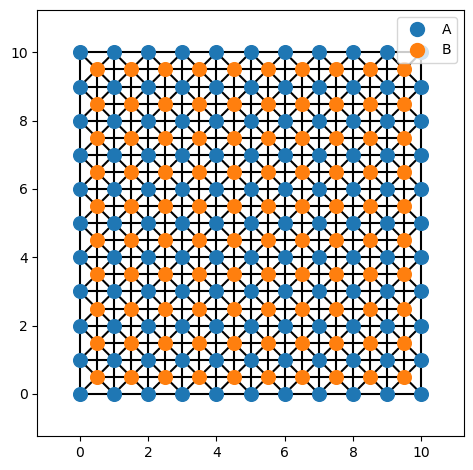

In [3]:
#RETICULO 5X5 EN 2D CON 1 CONEXION
latt = lp.Lattice(np.eye(2))

latt.add_atom([1,  1], "A")
latt.add_atom([1.5,  1.5], "B")
#latt.add_atom([5,  5], "B")
#Agregamos conexiones de primer vecino
latt.add_connections(1)

#Construimos la red con un tamaño finito, por ejemplo, 5x5
latt.build((10,10))

latt.analyze()
latt.plot()
plt.show()

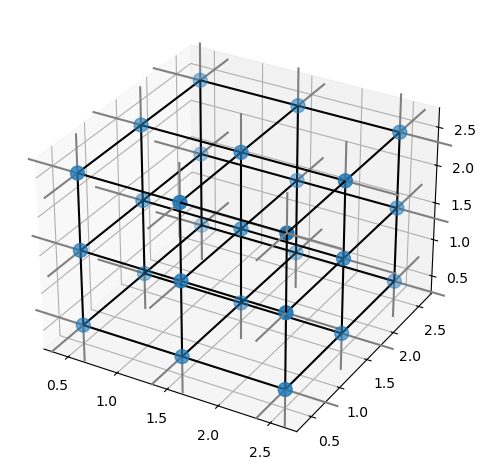

In [4]:
#RETICULO 5X5 EN 3D CON 1 CONEXION
latt = lp.Lattice(np.eye(3))

latt.add_atom([0.5,  0.5, 0.5], "A")

#Agregamos conexiones de primer vecino
latt.add_connections(1)
#Construimos la red con un tamaño finito, por ejemplo, 5x5
latt.build((3,3, 3))
latt.set_periodic([0, 1,2])

latt.analyze()
latt.plot()
plt.show()

In [5]:
#BENCHMARKING

#VARIABLES
dimensiones = 7
num_atoms= 2
num_conex=1
limite = 2
atom_index = 0

# Comenzamos el benchmarking
start_total = time.time()  # Marca el inicio del tiempo total
# Creación de la red
start = time.time()
latt = lp.Lattice(np.eye(dimensiones))
print(f"Tiempo para construir el reticulo {dimensiones} dimensional: {time.time() - start:.5f} segundos")
# Agregar átomos a la red
start = time.time()
crear_atomos(latt, num_atoms, dimensiones)
print(f"Tiempo para agregar átomos: {time.time() - start:.5f} segundos")
# Agregar conexiones de primer vecino
start = time.time()
latt.add_connections(num_conex)
print(f"Tiempo para agregar conexiones de los primeros {num_conex} vecinos mas cercanos: {time.time() - start:.5f} segundos")

# Construir la red con tamaño finito
start = time.time()
latt.build((limite,) * dimensiones)
print(f"Tiempo para construir la red de tamaño {' x '.join([str(limite)] * dimensiones)}:: {time.time() - start:.5f} segundos")

# Analizar la red
start = time.time()
latt.analyze()
print(f"Tiempo para analizar la red: {time.time() - start:.5f} segundos")

atom_index = 0
# Obtener vecinos del sitio seleccionado
start = time.time()
neighbors = latt.neighbors(atom_index)
print(f"Tiempo para obtener vecinos del átomo {atom_index}: {time.time() - start:.5f} segundos")

# Obtener posiciones de los vecinos
start = time.time()
positions = [latt.position(neighbor) for neighbor in neighbors]
#print("Las posiciones de los vecinos son:")
#print(positions)
print(f"Tiempo para obtener posiciones de los vecinos: {time.time() - start:.5f} segundos")

# Tiempo total
print(f"Tiempo total de ejecución: {time.time() - start_total:.5f} segundos")

Tiempo para construir el reticulo 7 dimensional: 0.00441 segundos
Tiempo para agregar átomos: 0.00051 segundos
Tiempo para agregar conexiones de los primeros 1 vecinos mas cercanos: 0.64096 segundos
Tiempo para construir la red de tamaño 2 x 2 x 2 x 2 x 2 x 2 x 2:: 0.02226 segundos
Tiempo para analizar la red: 0.65982 segundos
Tiempo para obtener vecinos del átomo 0: 0.00000 segundos
Tiempo para obtener posiciones de los vecinos: 0.00050 segundos
Tiempo total de ejecución: 1.32976 segundos


Coordenadas del punto más cercano desde el punto objetivo [6 6]: [5 5]
Coordenadas del vector más cercano desde el punto objetivo [6 6]: [-1, -1]
Norma del vector más cercano: 1.41


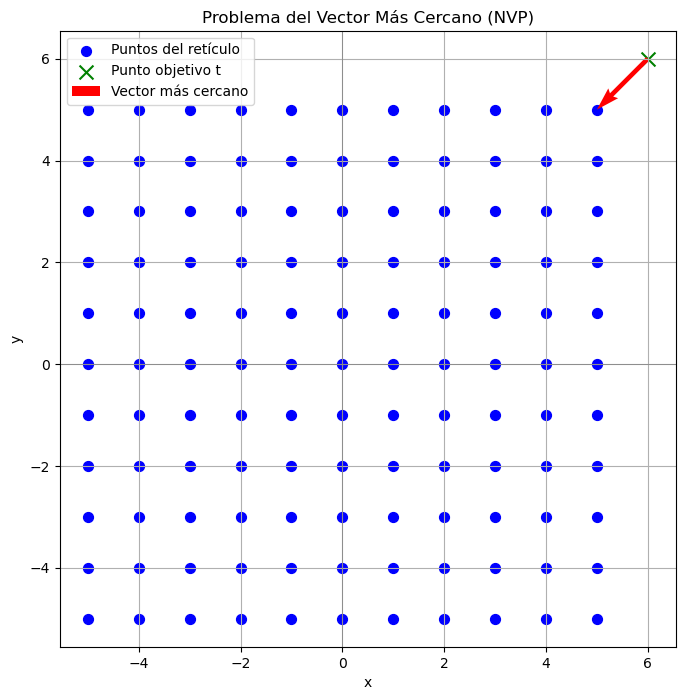

In [6]:
# PROBLEMA DEL VECTOR MAS CERCANO EN 2D
base = np.array([[1, 0], [0, 1]])  # Base de un retículo triangular
num_atoms = 1
dimensiones = 2
target_point = np.array([6,6])  # Punto sobre el que buscar el vector mas cercano
limite = 5
# Crear el retículo con lattpy
latt = lp.Lattice(base)
crear_atomos(latt, num_atoms, dimensiones)
latt.add_connections(1)  # Conexión de primer vecino

# Construir un retículo finito de tamaño 5x5
latt.build((5, 5))

# Generar puntos del retículo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Temporizador: Medir solo el tiempo de encontrar el vector más cercano
start_time = time.time()
nearest_vector, nearest_norm = nearestVector(base, limite, puntos_reticulo, target_point)
# Fin del temporizador
end_time = time.time()


nearest_point =  target_point + nearest_vector

# Imprimir el vector más cercano con todas las coordenadas
print(f"Coordenadas del punto más cercano desde el punto objetivo {target_point}: {nearest_point}")
print(f"Coordenadas del vector más cercano desde el punto objetivo {target_point}: {np.array2string(nearest_vector, separator=', ')}")
print(f"Norma del vector más cercano: {nearest_norm:.2f}")


# Visualización
plt.figure(figsize=(8, 8))

# Puntos del retículo
plt.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], c="blue", label="Puntos del retículo", s=50)  # Aumentar tamaño de los puntos

# Punto objetivo t
plt.scatter(target_point[0], target_point[1], c="green", label="Punto objetivo t", s=100, marker="x")  # Diferenciar el punto objetivo

# Vector más cercano (ajustar la escala)
# La flecha va desde target_point hasta nearest_point
plt.quiver(target_point[0], target_point[1], nearest_point[0] - target_point[0], nearest_point[1] - target_point[1],
           angles='xy', scale_units='xy', scale=1, color="red", label="Vector más cercano")  # Ajuste la escala para la visualización

# Líneas de referencia para los ejes
plt.axhline(0, color="gray", lw=0.5)
plt.axvline(0, color="gray", lw=0.5)

# Configurar la vista para que la relación de aspecto sea igual (para que los ejes no distorsionen)
plt.gca().set_aspect('equal', adjustable='box')

# Agregar leyenda y título
plt.legend()
plt.title("Problema del Vector Más Cercano (NVP)")
plt.xlabel("x")
plt.ylabel("y")

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


Coordenadas del punto más cercano desde el punto objetivo [6 6 6]: [5 5 5]
Coordenadas del vector más cercano desde el punto objetivo [6 6 6]: [-1, -1, -1]
Norma del vector más cercano: 1.73


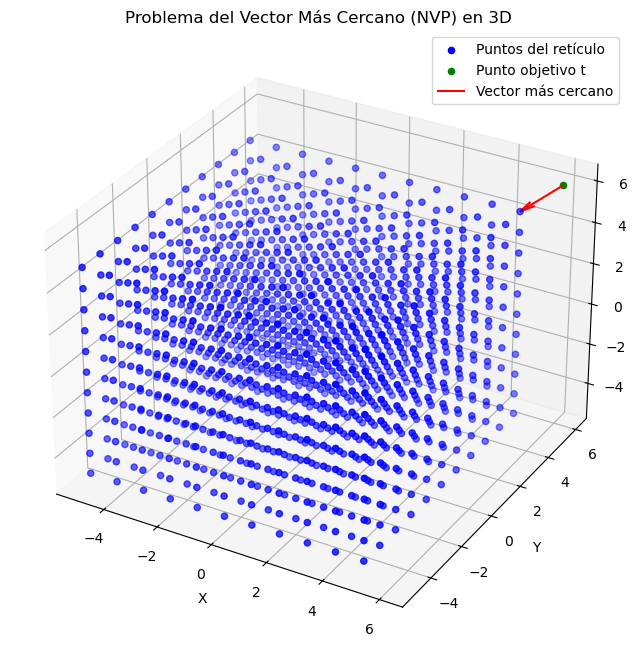

In [7]:
# Base para el retículo (3D)
base = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Base de un retículo triangular 3D
num_atoms = 1
dimensiones = 3
target_point = np.array([6, 6, 6])  # Punto sobre el que buscar el vector más cercano
limite= 5
# Crear el retículo con lattpy
latt = lp.Lattice(base)
crear_atomos(latt, num_atoms, dimensiones)
latt.add_connections(1)  # Conexión de primer vecino

# Construir un retículo finito de tamaño 5x5x5 (en 3D)
latt.build((5, 5, 5))

# Generar puntos del retículo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Temporizador: Medir solo el tiempo de encontrar el vector más cercano
start_time = time.time()
nearest_vector, nearest_norm = nearestVector(base, limite, puntos_reticulo, target_point)
# Fin del temporizador
end_time = time.time()

# Calcular el punto más cercano
nearest_point = target_point + nearest_vector

# Imprimir el vector más cercano con todas las coordenadas
print(f"Coordenadas del punto más cercano desde el punto objetivo {target_point}: {nearest_point}")
print(f"Coordenadas del vector más cercano desde el punto objetivo {target_point}: { np.array2string(nearest_vector, separator=', ')}")
print(f"Norma del vector más cercano: {nearest_norm:.2f}")

# Visualización en 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Puntos del retículo
ax.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], puntos_reticulo[:, 2], c="blue", label="Puntos del retículo")  # Puntos del retículo
ax.scatter(target_point[0], target_point[1], target_point[2], c="green", label="Punto objetivo t")  # Punto objetivo t

# Vector más cercano
ax.quiver(target_point[0], target_point[1], target_point[2], 
          nearest_point[0] - target_point[0], nearest_point[1] - target_point[1], nearest_point[2] - target_point[2],
          color="red", label="Vector más cercano", length=nearest_norm, normalize=True)

# Configurar el gráfico
ax.set_aspect('auto')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.set_title("Problema del Vector Más Cercano (NVP) en 3D")
plt.show()


Coordenadas del vector más corto: [0., 1.]
Norma del vector más corto: 1.00
Tiempo para encontrar el vector más corto: 0.06615 segundos


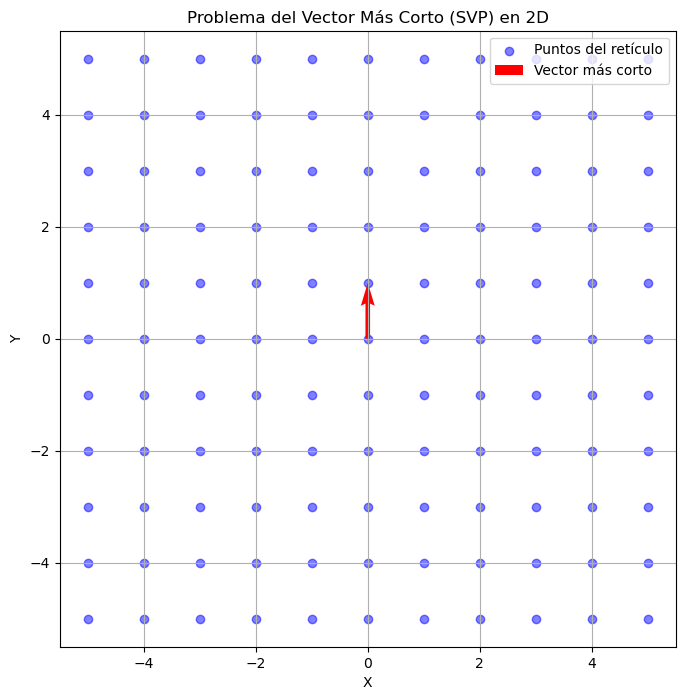

In [8]:
# PROBLEMA DEL SVP (en 2D)
# VARIABLES
dimensiones = 2  # Ahora en 2D
num_atomos = 1
num_conex = 1
limite = 5  # Limite para las combinaciones de los vectores base (por ejemplo, de -2 a 2)

# Base para el retículo (dimensiones generales)
base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en 2D

# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
points = latt.positions  # Coordenadas de todos los puntos del retículo

# Calculamos todos los posibles puntos del reticulo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Temporizador: Medir solo el tiempo de encontrar el vector más corto
start_time = time.time()
mejor_vector, menor_norma = shortestVector(base, limite, puntos_reticulo)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más corto con todas las coordenadas
print("Coordenadas del vector más corto:", np.array2string(mejor_vector, separator=', '))
print(f"Norma del vector más corto: {menor_norma:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más corto
print(f"Tiempo para encontrar el vector más corto: {end_time - start_time:.5f} segundos")

# Visualización en 2D del retículo y el vector más corto
plt.figure(figsize=(8, 8))

# Puntos del retículo
plt.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], c="blue", label="Puntos del retículo", alpha=0.5)

# Vector más corto
plt.quiver(0, 0, mejor_vector[0], mejor_vector[1], angles='xy', scale_units='xy', scale=1, color="red", label="Vector más corto", linewidth=2)

# Configurar el gráfico
plt.title("Problema del Vector Más Corto (SVP) en 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()


Coordenadas del vector más corto: [0., 0., 1.]
Norma del vector más corto: 1.00
Tiempo para encontrar el vector más corto: 8.66434 segundos


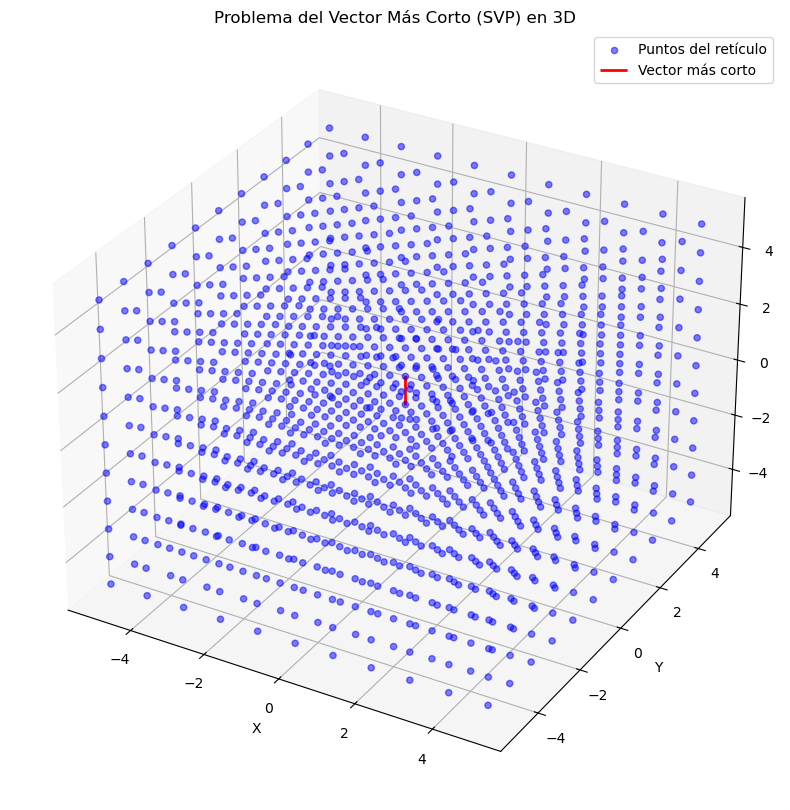

In [9]:
#PROBLEMA DEL SVP EN 3D
# VARIABLES
dimensiones = 3
num_atomos = 1
num_conex = 1
limite = 5  # Limite para las combinaciones de los vectores base (por ejemplo, de -5 a 5)

# Base para el retículo (dimensiones generales)
base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en N dimensiones
#base = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Base de un retículo triangular 3D

# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
points = latt.positions  # Coordenadas de todos los puntos del retículo

# Calculamos todos los posibles puntos del reticulo
puntos_reticulo = generar_puntos_reticulo(base, limite)
# Temporizador: Medir solo el tiempo de encontrar el vector más corto
start_time = time.time()
mejor_vector, menor_norma =shortestVector(base, limite, puntos_reticulo)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más corto con todas las coordenadas
print("Coordenadas del vector más corto:", np.array2string(mejor_vector, separator=', '))
print(f"Norma del vector más corto: {menor_norma:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más corto
print(f"Tiempo para encontrar el vector más corto: {end_time - start_time:.5f} segundos")

# Visualización en 3D del retículo y el vector más corto
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Puntos del retículo
ax.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], puntos_reticulo[:, 2], 
           c="blue", label="Puntos del retículo", alpha=0.5)

# Vector más corto
ax.quiver(0, 0, 0, 
          mejor_vector[0], mejor_vector[1], mejor_vector[2], 
          color="red", label="Vector más corto", linewidth=2, arrow_length_ratio=0.1)

# Configurar el gráfico
ax.set_title("Problema del Vector Más Corto (SVP) en 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()



In [10]:
#PROBLEMA DEL NVP
# VARIABLES
dimensiones = 7
num_atomos = 2
num_conex = 1
limite = 2  # Establecer un límite de combinaciones de enteros para generar el retículo

# Base para el retículo (dimensiones generales)
base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en N dimensiones

# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Definir el punto objetivo de manera arbitraria (puede ser cualquier punto en el espacio)
target_point = np.array([1.2, 0.5, 0.8, 0.1, 0.6, 0.3, 0.7])  # Ejemplo de un punto objetivo

# Temporizador: Medir solo el tiempo de encontrar el vector más cercano
start_time = time.time()
nearest_vector, nearest_norm = nearestVector(base, limite, puntos_reticulo, target_point)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más cercano con todas las coordenadas
print(f"Coordenadas del vector más cercano desde el punto objetivo {target_point}:")
print("Coordenadas del vector más cercano:", np.array2string(nearest_vector, separator=', '))
print(f"Norma del vector más cercano: {nearest_norm:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más cercano
print(f"Tiempo para encontrar el vector más cercano: {end_time - start_time:.5f} segundos")

Coordenadas del vector más cercano desde el punto objetivo [1.2 0.5 0.8 0.1 0.6 0.3 0.7]:
Coordenadas del vector más cercano: [-0.2, -0.5,  0.2, -0.1,  0.4, -0.3,  0.3]
Norma del vector más cercano: 0.82
Tiempo para encontrar el vector más cercano: 0.72171 segundos


In [11]:
#PROBLEMA DEL SVP
# VARIABLES
dimensiones = 3
num_atomos = 3
num_conex = 1
limite = 3  # Limite para las combinaciones de los vectores base (por ejemplo, de -2 a 2)

# Base para el retículo (dimensiones generales)
#base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en N dimensiones
base = np.array([[1.3, 0, 0], [0, np.sqrt(3)/2, 0], [0, 0, 0.1]])  # Base de un retículo triangular 3D

# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
points = latt.positions  # Coordenadas de todos los puntos del retículo

# Calculamos todos los posibles puntos del reticulo
puntos_reticulo = generar_puntos_reticulo(base, limite)
# Temporizador: Medir solo el tiempo de encontrar el vector más corto
start_time = time.time()
mejor_vector, menor_norma =shortestVector(base, limite, puntos_reticulo)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más corto con todas las coordenadas
print("Coordenadas del vector más corto:", np.array2string(mejor_vector, separator=', '))
print(f"Norma del vector más corto: {menor_norma:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más corto
print(f"Tiempo para encontrar el vector más corto: {end_time - start_time:.5f} segundos")



Coordenadas del vector más corto: [0. , 0. , 0.1]
Norma del vector más corto: 0.10
Tiempo para encontrar el vector más corto: 0.55211 segundos
